# Overview

This is my First Machine Learning Project
Data Science 
Machine Learning

This Notebook an Attempt for the Kaggle Competition  [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)



## Workflow Stages

1.   Define Problems
2.   Acquire Training and Testing Data
3.   Exploratory Data Analysis
4.   Data Preprocessing
5.   Select and Train a Model
6.   Fine Tune Machine Learning Model
7.   Predict


## Goal

*   It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable
*   What Sorts of People Were More Likely to Srvive the Titanic Sinking





## Metric

Your score is the percentage of passengers you correctly predict. This is known as accuracy

# Aquire Data

Mount Google Drive to This Notebook

In [282]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Configure Path to kaggle.json

In [283]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) API Token"

Change Current Working Directory

In [284]:
%cd /content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Titanic - Machine Learning from Disaster/Datasets

/content/gdrive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Titanic - Machine Learning from Disaster/Datasets


Download Titanic Datasets from Kaggle

In [285]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


# Exploratory Data Analysis (EDA)

## Data Inspection

From Inspection, Some Irrelevant Columns Can be Dropped
*   PassengerID
*   Name
*   Ticket
*   Cabin



In [286]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [287]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 Passengers in the Training Dataset, But There is Only 714 Age Data Meaning Imputation for Age is Required to Fill the Missing Values.

In [288]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Age Values Could be Imputed with the Mean 

In [289]:
test = pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [290]:
train.shape

(891, 12)

In [291]:
test.shape

(418, 11)

Count the Value of Survived(1) and Deceased(0) Pessengers

In [292]:
survived = train['Survived'].value_counts()
survived

0    549
1    342
Name: Survived, dtype: int64

Count the Value of Male and Female Passengers

In [293]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [294]:
sur_sex = pd.crosstab(train['Survived'], train['Sex'])
sur_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


Survive and Decease by Class

In [295]:
sur_cla = pd.crosstab(train['Survived'], train['Pclass'])
sur_cla

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [296]:
train.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## Univariate Analysis

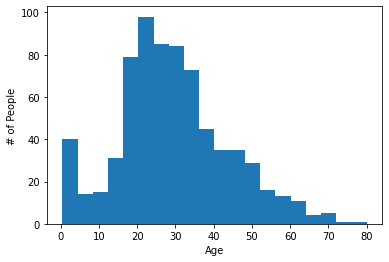

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(train['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('# of People')
plt.show()

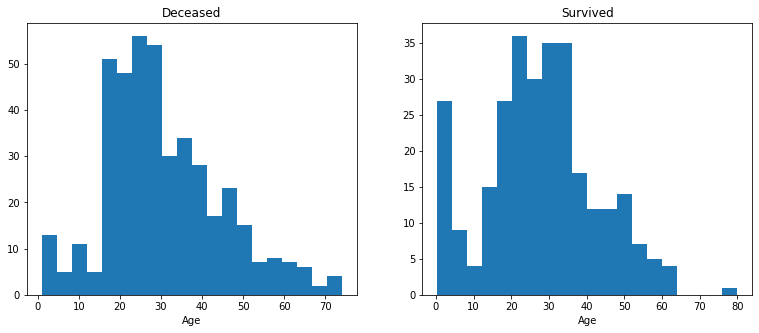

In [298]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[0].set_title('Deceased')
ax[1].set_title('Survived')
ax[0].hist(train['Age'].where(train['Survived']==0), bins=20)
ax[1].hist(train['Age'].where(train['Survived']==1), bins=20)
plt.show()

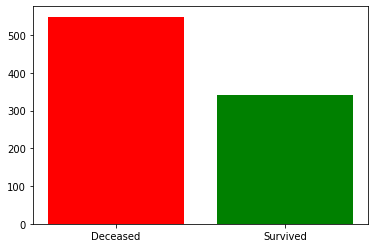

In [299]:
plt.bar(survived.index, survived, color=['r', 'g'], tick_label = ('Deceased', 'Survived'))
plt.show()

Most of the People Have Deceased

## Bivariate Analysis

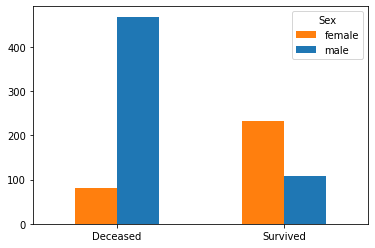

In [300]:
sur_sex.plot(kind='bar', color=['C1', 'C0'], xlabel='').set_xticklabels(['Deceased', 'Survived'], rotation=0)
plt.show()

More Male Than Female Have Deceased

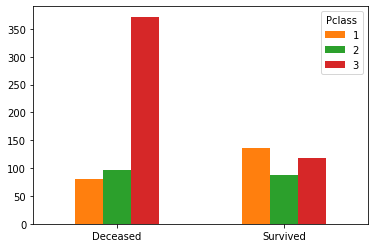

In [301]:
sur_cla.plot(kind='bar', color=['C1', 'C2', 'C3'], xlabel='').set_xticklabels(['Deceased', 'Survived'], rotation=0)
plt.show()

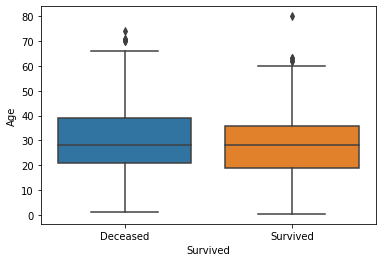

In [302]:
sns.boxplot(x=train['Survived'], y=train['Age']).set(xticklabels=['Deceased', 'Survived'])
plt.show()

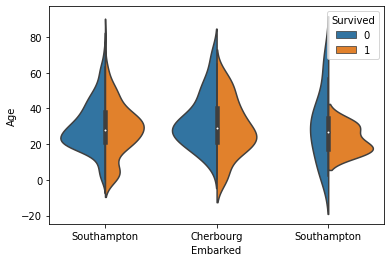

In [303]:
sns.violinplot(x=train['Embarked'], y=train['Age'], hue=train['Survived'], split=True).set(xticklabels=['Southampton', 'Cherbourg', 'Southampton'])
#plt.legend(title='Sruvived', labels=['Deceased', 'Survived'])
plt.show()

## Correlation Analysis

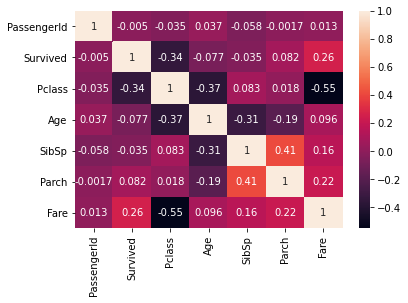

In [304]:
corr_mat = train.corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

Survival Rate and Fare Have the Strongest Correlation

# Data Preprocessing

## Training Dataset Preprocessing

The Missing Values Have to Be Estimated Since There are Only 714 and 889 Values for Age and Embarkedm

Drop Indifferent Columns
*   PassengerId (Meaningless Feature)
*   Name (Meaningless Feature)
*   Ticket (Meaningless Feature)
*   Cabin (Too Many Missing Values)



In [305]:
train_drop = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


We Need to Create a Copy of The Data Without the Text Attribute Sex to Impute Age

In [306]:
age = train[['Age']]

Impute Missing Age Values With Mean Since the Data is Well Distributed (Median in Case There're a Lot of Outliers)

In [307]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
age_imputed = pd.DataFrame(imputer.fit_transform(age), columns=age.columns)
age_imputed

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [308]:
imputer.statistics_

array([29.69911765])

Drop the Original Age Column in train_drop and Append the Imputed Age Column

In [309]:
train_drop_age = train_drop.drop(['Age'], axis=1)
train_drop_age

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [310]:
train_age_imputed = pd.concat([train_drop_age, age_imputed], axis=1)
train_age_imputed

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,male,1,0,7.2500,S,22.000000
1,1,1,female,1,0,71.2833,C,38.000000
2,1,3,female,0,0,7.9250,S,26.000000
3,1,1,female,1,0,53.1000,S,35.000000
4,0,3,male,0,0,8.0500,S,35.000000
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,27.000000
887,1,1,female,0,0,30.0000,S,19.000000
888,0,3,female,1,2,23.4500,S,29.699118
889,1,1,male,0,0,30.0000,C,26.000000


There Are Also Some Missing Values in The Embarked Column. Therefore, We Fill the Values with The Mode of Embarked

In [311]:
train_age_imputed['Embarked'].mode()[0]

'S'

In [312]:
train_age_imputed['Embarked'].fillna(train_age_imputed['Embarked'].mode()[0], inplace=True)
train_age_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   Age       891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Encode Categorical Attributes (Sex and Embarked)

Encode Sex with LabelEncoder (Female = 0, Male = 1)

In [313]:
from sklearn.preprocessing import LabelEncoder
sex_temp = train_age_imputed['Sex']
labelencoder = LabelEncoder()
sex_encoded = labelencoder.fit_transform(sex_temp)
labelencoder.classes_


array(['female', 'male'], dtype=object)

In [314]:
sex = pd.DataFrame(sex_encoded, columns=['Sex'])
sex

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Encode Embarked with OneHotEncoder

In [315]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
embarked_temp = train_age_imputed['Embarked']
embarked_encoded = onehotencoder.fit_transform(embarked_temp.values.reshape(-1, 1))
onehotencoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [316]:
embarked_encoded

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [317]:
embarked_encoded_array = embarked_encoded.toarray()
embarked = pd.DataFrame(embarked_encoded_array, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])
embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


Put Encoded Sex and Embarked Value into a Dataframe and Concatenate into train_age_imputed

In [318]:
embarked_sex_encoded = pd.concat([embarked, sex], axis=1)
embarked_sex_encoded

,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0.0,0.0,1.0,1
1,1.0,0.0,0.0,0
2,0.0,0.0,1.0,0
3,0.0,0.0,1.0,0
4,0.0,0.0,1.0,1
...,...,...,...,...
886,0.0,0.0,1.0,1
887,0.0,0.0,1.0,0
888,0.0,0.0,1.0,0
889,1.0,0.0,0.0,1


In [319]:
train_age_imputed_drop = train_age_imputed.drop(['Sex', 'Embarked'], axis=1)
train_pred = pd.concat([train_age_imputed_drop, embarked_sex_encoded], axis=1)
train_pred

,Survived,Pclass,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,3,1,0,7.2500,22.000000,0.0,0.0,1.0,1
1,1,1,1,0,71.2833,38.000000,1.0,0.0,0.0,0
2,1,3,0,0,7.9250,26.000000,0.0,0.0,1.0,0
3,1,1,1,0,53.1000,35.000000,0.0,0.0,1.0,0
4,0,3,0,0,8.0500,35.000000,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,0.0,0.0,1.0,1
887,1,1,0,0,30.0000,19.000000,0.0,0.0,1.0,0
888,0,3,1,2,23.4500,29.699118,0.0,0.0,1.0,0
889,1,1,0,0,30.0000,26.000000,1.0,0.0,0.0,1


## Testing Dataset Preprocessing

In [320]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [321]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Drop Indifferent Columns

In [322]:
test_drop = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_drop

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


Impute Missing Age Values With the Mean

In [323]:
test_age = test_drop[['Age']]
test_age_imputed = pd.DataFrame(imputer.fit_transform(test_age), columns=test_age.columns)
test_age_imputed

,Age
0,34.50000
1,47.00000
2,62.00000
3,27.00000
4,22.00000
...,...
413,30.27259
414,39.00000
415,38.50000
416,30.27259


Encode Sex with LabelEncoder

In [324]:
test_sex = test_drop['Sex']
test_sex_encoded = labelencoder.fit_transform(test_sex)
labelencoder.classes_

array(['female', 'male'], dtype=object)

In [325]:
test_sex = pd.DataFrame(test_sex_encoded, columns=['sex'])
test_sex

,sex
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


Encode Embarked Column with OneHotEncoder

In [326]:
test_embarked = test_drop['Embarked']
test_embarked_encoded = onehotencoder.fit_transform(test_embarked.values.reshape(-1, 1))
onehotencoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [327]:
test_embarked_encoded_array = test_embarked_encoded.toarray()
test_embarked = pd.DataFrame(test_embarked_encoded_array, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])
test_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
413,0.0,0.0,1.0
414,1.0,0.0,0.0
415,0.0,0.0,1.0
416,0.0,0.0,1.0


In [328]:
test_drop

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


Concatenate Imputed Age, Labelencoded Sex and Onehotencoded Embarked into test_drop and Rename to test_pred Dataframe

*   test_age_imputed
*   test_sex

Fill Missing Fare Value with the Mean of Fare



In [329]:
test_drop_temp = test_drop.drop(['Sex', 'Embarked', 'Age'], axis=1)
test_pred = pd.concat([test_drop_temp, test_age_imputed, test_embarked, test_sex], axis=1)
test_pred['Fare'] = test_pred['Fare'].fillna(test_pred['Fare'].mean())

Examine Processed the test_pred and train_pred Data

In [330]:
test_pred

,Pclass,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,sex
0,3,0,0,7.8292,34.50000,0.0,1.0,0.0,1
1,3,1,0,7.0000,47.00000,0.0,0.0,1.0,0
2,2,0,0,9.6875,62.00000,0.0,1.0,0.0,1
3,3,0,0,8.6625,27.00000,0.0,0.0,1.0,1
4,3,1,1,12.2875,22.00000,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,30.27259,0.0,0.0,1.0,1
414,1,0,0,108.9000,39.00000,1.0,0.0,0.0,0
415,3,0,0,7.2500,38.50000,0.0,0.0,1.0,1
416,3,0,0,8.0500,30.27259,0.0,0.0,1.0,1


In [331]:
test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Age         418 non-null    float64
 5   Embarked_C  418 non-null    float64
 6   Embarked_Q  418 non-null    float64
 7   Embarked_S  418 non-null    float64
 8   sex         418 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [332]:
train_pred

,Survived,Pclass,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,3,1,0,7.2500,22.000000,0.0,0.0,1.0,1
1,1,1,1,0,71.2833,38.000000,1.0,0.0,0.0,0
2,1,3,0,0,7.9250,26.000000,0.0,0.0,1.0,0
3,1,1,1,0,53.1000,35.000000,0.0,0.0,1.0,0
4,0,3,0,0,8.0500,35.000000,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,0.0,0.0,1.0,1
887,1,1,0,0,30.0000,19.000000,0.0,0.0,1.0,0
888,0,3,1,2,23.4500,29.699118,0.0,0.0,1.0,0
889,1,1,0,0,30.0000,26.000000,1.0,0.0,0.0,1


In [333]:
train_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Age         891 non-null    float64
 6   Embarked_C  891 non-null    float64
 7   Embarked_Q  891 non-null    float64
 8   Embarked_S  891 non-null    float64
 9   Sex         891 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 69.7 KB


# Select and Train a Model


We First Split the Train and Test Data with The Training Dataset with 80% Training Data and 20% Testing Data

In [334]:
from sklearn.model_selection import train_test_split
X = train_pred.drop(['Survived'], axis=1)
y = train_pred['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2456)

## Stochastic Gradient Decent (SGD)

In [335]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [336]:
sgd_predict = sgd.predict(X_test)
sgd_predict

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1])

In [337]:
sgd_score = sgd.score(X_train, y_train)
sgd_score

0.6924157303370787

## Support Vector Machine

In [338]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [339]:
svm_predict = svm.predict(X_test)
svm_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [340]:
svm_score = svm.score(X_train, y_train)
svm_score

0.6853932584269663

## Random Forest Classifier

In [341]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [342]:
rfc_predict = rfc.predict(X_test)
rfc_predict

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1])

In [343]:
rfc_score = rfc.score(X_train, y_train)
rfc_score

0.9845505617977528

## K Nearest Neighbour

In [344]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [345]:
knn_predict = knn.predict(X_test)
knn_predict

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [346]:
knn_score = knn.score(X_train, y_train)
knn_score

0.8075842696629213

## Logistic Regression

In [347]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [348]:
logreg_predict = logreg.predict(X_test)
logreg_predict

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1])

In [349]:
logreg_score = logreg.score(X_test, y_test)
logreg_score

0.776536312849162

## Decision Tree

In [350]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [351]:
decision_tree_predict = decision_tree.predict(X_test)
decision_tree_predict

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0])

In [352]:
decision_tree_score = decision_tree.score(X_train, y_train)
decision_tree_score

0.9845505617977528

## Evulate Model Scores

In [353]:
scores = pd.DataFrame({'Score': [sgd_score, svm_score, rfc_score, knn_score, logreg_score, decision_tree_score],
                      'Model': ['Stochastic Gradient Decent (SGD)', 'Support Vector Machine', 'Random Forest Classifier', 'K Neatest Neighbour', 'Logistic Regression', 'Decision Tree']}                      
                      )
scores['Score'] = round(scores['Score']*100, 1)
scores.sort_values(['Score'], ascending=False)

,Score,Model
2,98.5,Random Forest Classifier
5,98.5,Decision Tree
3,80.8,K Neatest Neighbour
4,77.7,Logistic Regression
0,69.2,Stochastic Gradient Decent (SGD)
1,68.5,Support Vector Machine


As Shown in the Table Above, Random Forest Classifier Has the Highest Score. We Are Going to Evulate the Model

# Random Forest

## K-Fold Cross Validation

Let's Check How Random Forest Classifier Performs Using Cross Validation with 10 Folds

In [354]:
from sklearn.model_selection import cross_val_score
rfc_cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
print('Scores:', rfc_cv_scores)
print('Mean:', rfc_cv_scores.mean())
print('Standard Deviation:', rfc_cv_scores.std())

Scores: [0.77777778 0.84722222 0.83098592 0.71830986 0.87323944 0.70422535
 0.81690141 0.77464789 0.8028169  0.91549296]
Mean: 0.806161971830986
Standard Deviation: 0.062280989262784504


Our Model Has a Average Accuracy of 81% with a Standard Deviation of 6.6%
Overall, the Accuracy of the Model is Fairly Good

## Measure Feature Importance of the Random Forest Model

In [355]:
feature_importances = rfc.feature_importances_
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance = importance.sort_values('Importance', ascending=False)
importance

,Feature,Importance
8,Sex,0.269867
3,Fare,0.268840
4,Age,0.246727
0,Pclass,0.090519
1,SibSp,0.051126
2,Parch,0.037080
7,Embarked_S,0.014794
5,Embarked_C,0.013180
6,Embarked_Q,0.007868


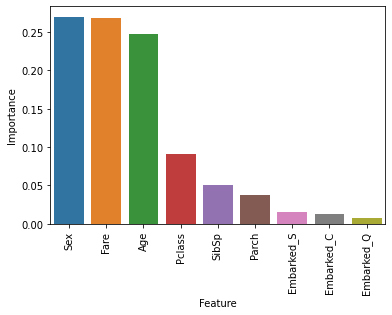

In [356]:
importance_bar = sns.barplot(x=importance['Feature'], y=importance['Importance'])
importance_bar.set_xticklabels(importance['Feature'], rotation=90)
plt.show()

Fare, Sex and Age are the Most Important Features and Seems Like the Embarked Features are not as Important

## Training the Model Again

In [357]:
rfc = RandomForestClassifier(oob_score=True)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [358]:
rfc_predict = rfc.predict(X_test)
rfc_predict

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1])

In [359]:
rfc.score(X_train, y_train)

0.9845505617977528

Measure the Out of Bag Score

In [360]:
rfc_oob_score = rfc.oob_score_
rfc_oob_score

0.8061797752808989

## Hyperparameter Tuning

In [361]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = np.linspace(100, 2000, 20).astype(int)
min_samples_split = np.linspace(2, 20, 10).astype(int)
min_samples_leaf = np.linspace(1, 10, 10).astype(int)

parameters = {'n_estimators': n_estimators, 'criterion': ['gini', 'entropy'],
              'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,    
              }

random_search = RandomizedSearchCV(rfc, parameters, cv=3, scoring='accuracy')

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [362]:
random_search.cv_results_

{'mean_fit_time': array([1.85183628, 1.83784413, 2.52953641, 3.02081966, 2.84167329,
        1.97459793, 0.77981361, 1.69297957, 0.72872233, 2.95972308]),
 'mean_score_time': array([0.09905577, 0.09942627, 0.14410822, 0.16474748, 0.16109776,
        0.1078457 , 0.04273423, 0.08842405, 0.04544846, 0.17644231]),
 'mean_test_score': array([0.83004172, 0.82300346, 0.83144819, 0.82442175, 0.82723469,
        0.81880178, 0.83144228, 0.81038069, 0.82864707, 0.82723469]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'gini', 'entropy', 'gini',
                    'gini', 'entropy', 'entropy', 'gini', 'gini'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[7, 8, 5, 2, 3, 3, 4, 1, 5, 2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
 

In [363]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=1700,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [364]:
random_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 1700}

In [365]:
random_search.best_score_

0.8314481910907823

## Test New Parameters

In [366]:
rfc_new_para = RandomForestClassifier(n_estimators=500, criterion='entropy', min_samples_leaf=5, min_samples_split=6, oob_score=True)
rfc_new_para.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [367]:
rfc_oob_score_new = rfc_new_para.oob_score_
rfc_oob_score_new

0.8258426966292135

In [368]:
print('OOB Score with Default Hyperparameters:', rfc_oob_score)
print('OOB Score with New Hyperparameters:', rfc_oob_score_new)
print('Difference:', rfc_oob_score_new - rfc_oob_score)
print('% Difference:', 100*((rfc_oob_score_new - rfc_oob_score)/ rfc_oob_score) , '%')

OOB Score with Default Hyperparameters: 0.8061797752808989
OOB Score with New Hyperparameters: 0.8258426966292135
Difference: 0.0196629213483146
% Difference: 2.4390243902439015 %


## Confusion Matrix

In [369]:
from sklearn.model_selection import cross_val_predict
train_predict = cross_val_predict(rfc_new_para, X_train, y_train, cv=3)

In [370]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, train_predict)
confusion_matrix

array([[402,  34],
       [ 88, 188]])

Text(0.5, 1.0, 'Confusion Matrix')

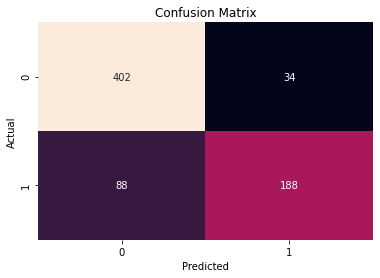

In [371]:
confusion_matrix_heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='g', cbar=False, 
                           )
confusion_matrix_heatmap.set_xlabel('Predicted')
confusion_matrix_heatmap.set_ylabel('Actual')
confusion_matrix_heatmap.set_title('Confusion Matrix')

## Precision and Racall

In [372]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_train, train_predict)
recall = recall_score(y_train, train_predict)
print('Precision Score:', precision)
print('Recall Score:', recall)

Precision Score: 0.8468468468468469
Recall Score: 0.6811594202898551


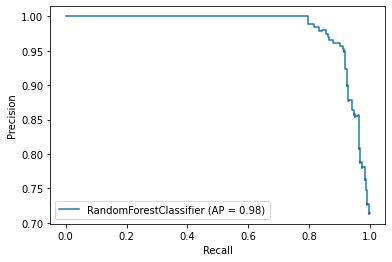

In [373]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rfc_new_para, X_train, train_predict)
plt.show()

## F1 Score

In [374]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_train, train_predict)
print('F1 Score:', f1_score)

F1 Score: 0.7550200803212852


## ROC AUC Curve

In [375]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, train_predict)

0.8015888844568542

In [376]:
from sklearn.metrics import roc_curve
roc_curve(y_train, train_predict)

(array([0.        , 0.07798165, 1.        ]),
 array([0.        , 0.68115942, 1.        ]),
 array([2, 1, 0]))

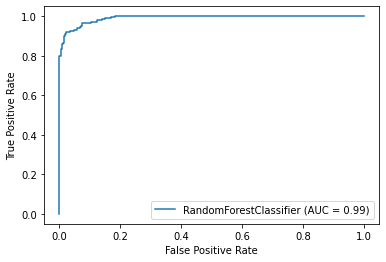

In [377]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc_new_para, X_train, train_predict)
plt.show()

# Final Prediction


In [378]:
final_prediction = rfc_new_para.predict(test_pred)

In [380]:
final_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [381]:
submission = pd.read_csv('gender_submission.csv')

In [385]:
submission['Survived'] = final_prediction
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
